In [1]:
import itertools
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
#默认字体为宋体
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['NSimSun']
#plt.plot(x,b,linewidth=1,label = '观测站A')
#plt.ylabel('位移',size = 12)
#plt.xlabel('时间/秒',size = 12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.legend(fontsize=12)

No handles with labels found to put in legend.


In [2]:
df = pd.read_csv(r"D:\Cindy\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_cols = ['age','trtbps','chol','thalachh','oldpeak']

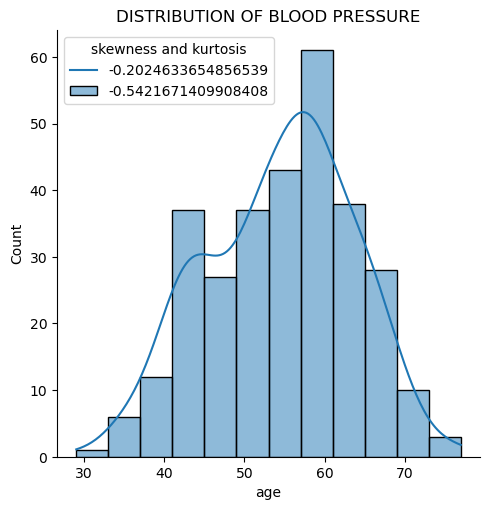

In [9]:
sns.displot(df["age"],kde=True)
plt.title("DISTRIBUTION OF BLOOD PRESSURE",fontsize=12)
skewness=str(df["age"].skew())
kurtosis=str(df["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.savefig('age.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [10]:
plt.figure(figsize=(20,8))


plt.subplot(1,4,1)
sns.distplot(df["age"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["age"].skew())
plt.legend([skewness],title=("skewness"))


plt.subplot(1,4,2)
stats.probplot(df["age"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
bcx_target, lam = boxcox(df["age"])
#lam is the best lambda for the distribution
sns.distplot(bcx_target)
plt.title("DISTRIBUTION AFTER BOX-COX ",)
series=pd.Series(bcx_target)
skewness=str(series.skew())
plt.legend([skewness],title=("skewness"))
#plt.show()

plt.subplot(1,4,4)
stats.probplot(series,dist="norm",plot=plt)
plt.grid()

plt.savefig('transformedage.png', dpi=500, bbox_inches = 'tight')

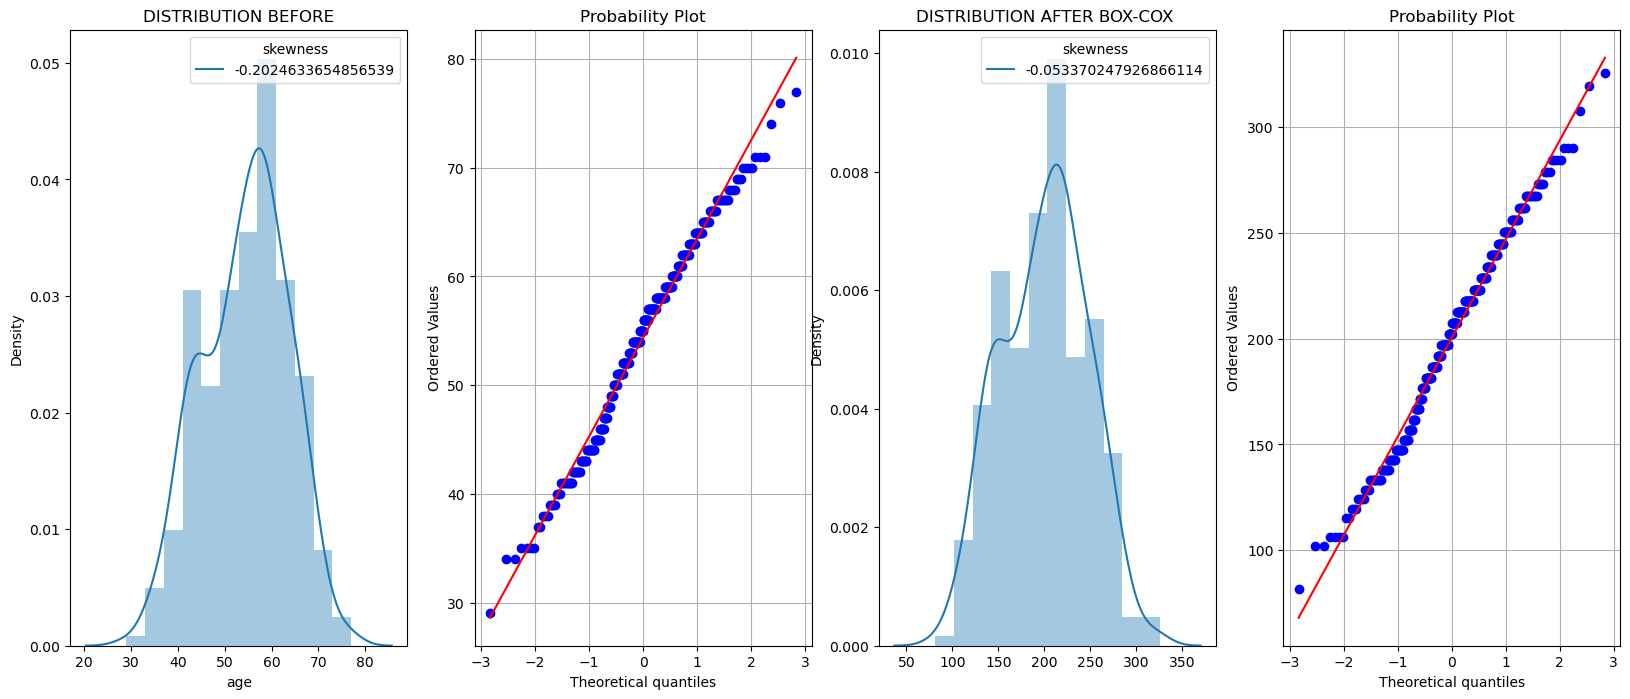

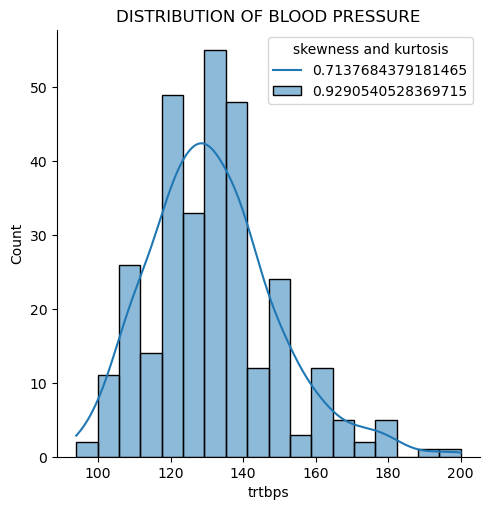

In [11]:
sns.displot(df["trtbps"],kde=True)
plt.title("DISTRIBUTION OF BLOOD PRESSURE",fontsize=12)
skewness=str(df["trtbps"].skew())
kurtosis=str(df["trtbps"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.savefig('trtbps.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [12]:
plt.figure(figsize=(20,8))


plt.subplot(1,4,1)
sns.distplot(df["trtbps"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["trtbps"].skew())
plt.legend([skewness],title=("skewness"))


plt.subplot(1,4,2)
stats.probplot(df["trtbps"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
reciprocal_target = 1/df["trtbps"]
sns.distplot(reciprocal_target)
plt.title("DISTRIBUTION AFTER RESIPROCAL ",)
skewness=str(reciprocal_target.skew())
plt.legend([skewness],title=("skewness"))
#plt.show()

plt.subplot(1,4,4)
stats.probplot(reciprocal_target,dist="norm",plot=plt)
plt.grid()

plt.savefig('transformedtrtbps.png', dpi=500, bbox_inches = 'tight')

In [13]:
sns.displot(df["chol"],kde=True)
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL",fontsize=12)
skewness=str(df["chol"].skew())
kurtosis=str(df["chol"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.savefig('chol.png', dpi=500, bbox_inches = 'tight')
#plt.show()

In [14]:
plt.figure(figsize=(20,8))

## log transformation
plt.subplot(1,4,1)
sns.distplot(df["chol"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["chol"].skew())
plt.legend([skewness],title=("skewness"))


plt.subplot(1,4,2)
stats.probplot(df["chol"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
log_target=np.log1p(df["chol"])
ax=sns.distplot(log_target)
plt.title("DISTRIBUTION AFTER LOG ",)
skewness=str(log_target.skew())
plt.legend([skewness],title=("skewness"))
#plt.show()

plt.subplot(1,4,4)
stats.probplot(log_target,dist="norm",plot=plt)
plt.grid()

plt.savefig('transformedchol.png', dpi=500, bbox_inches = 'tight')

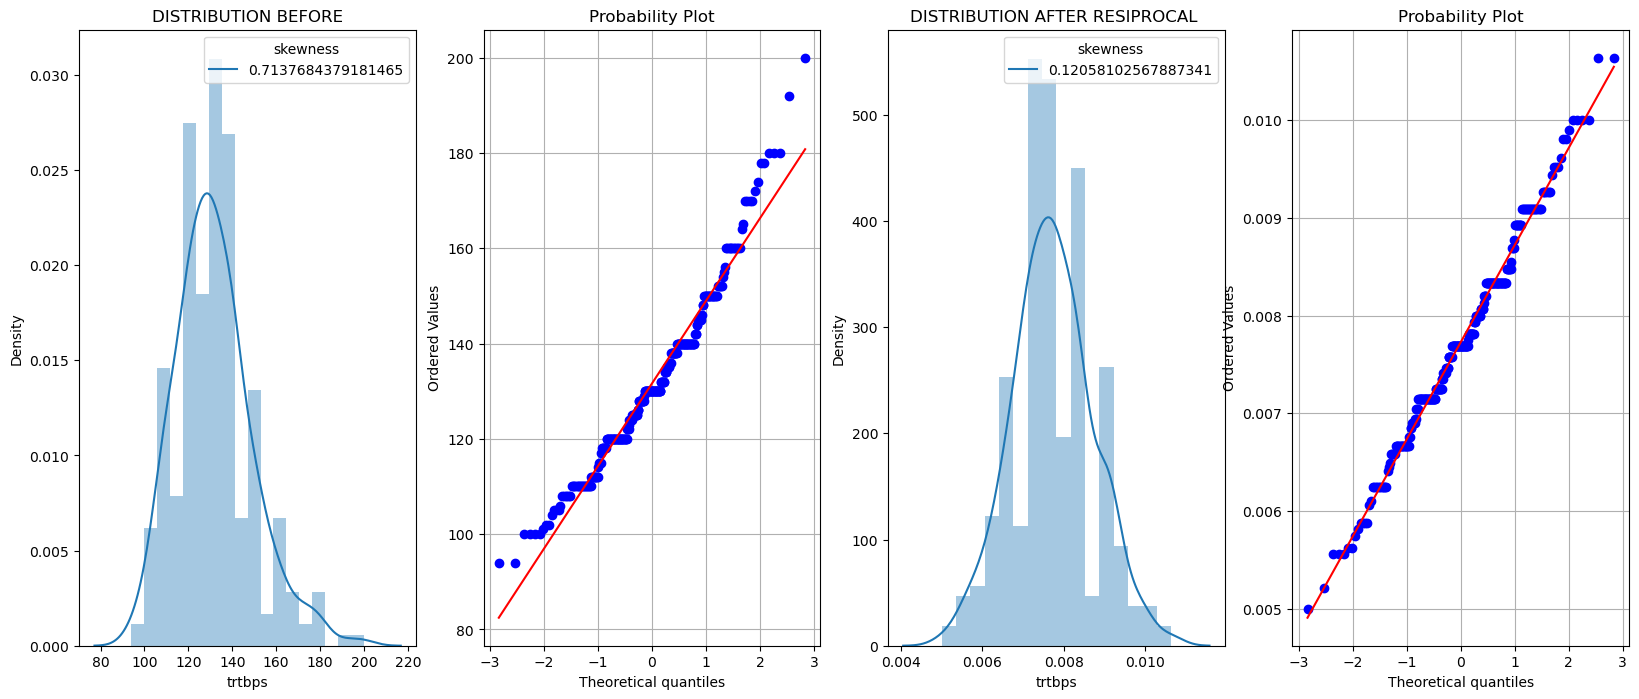

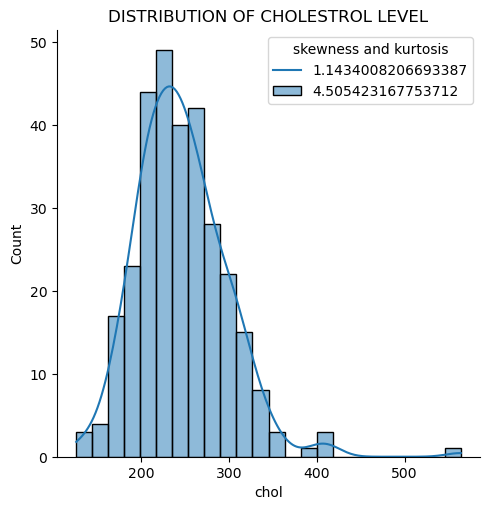

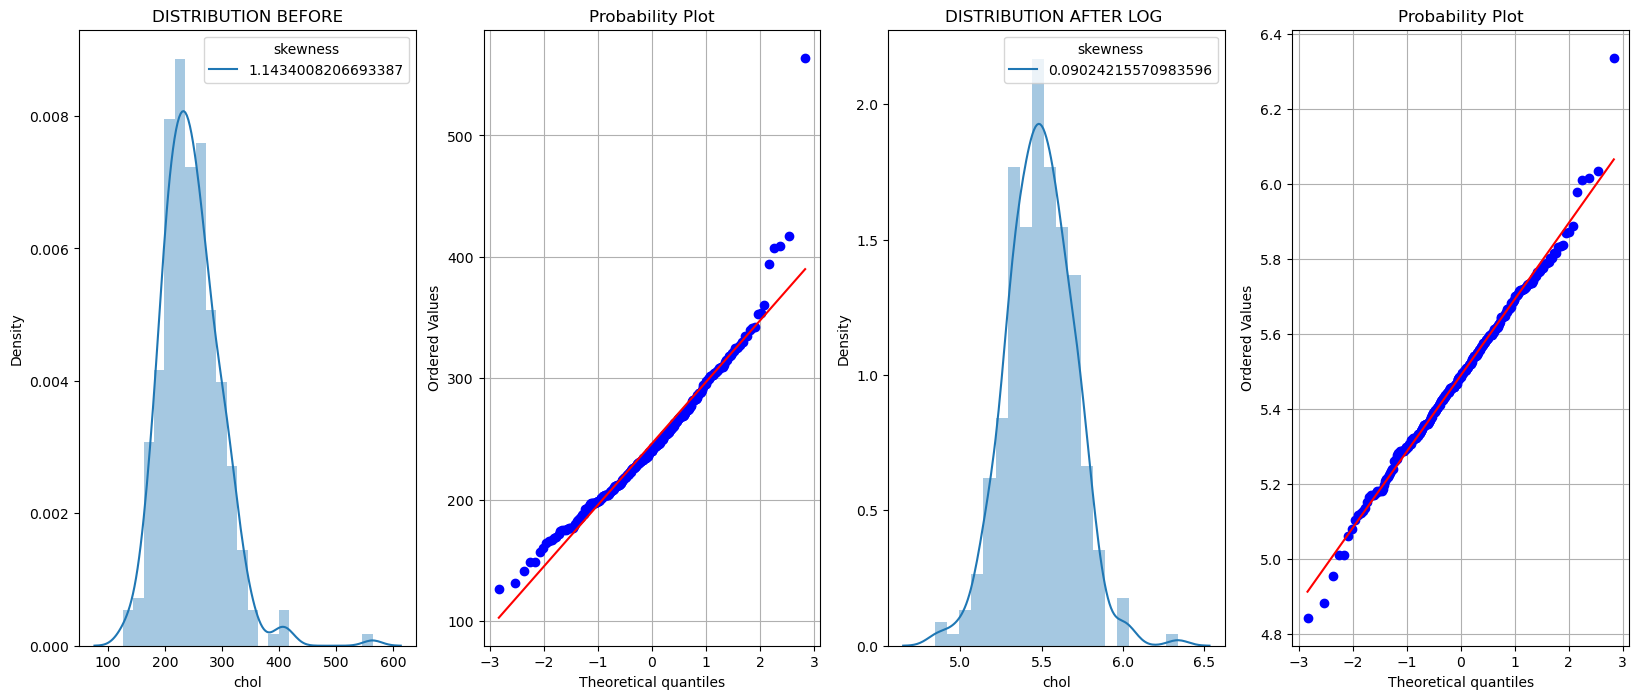

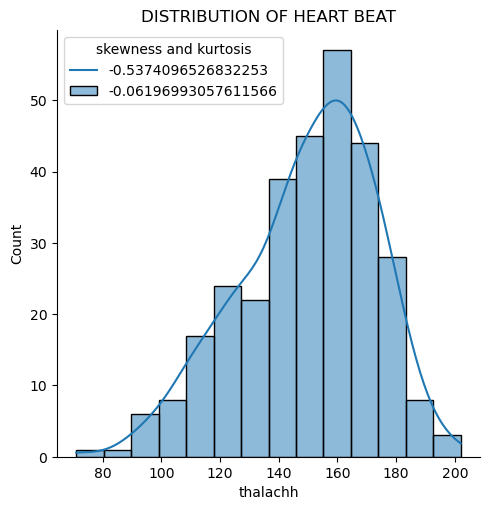

In [15]:
sns.displot(df["thalachh"],kde=True)
plt.title("DISTRIBUTION OF HEART BEAT",fontsize=12)
skewness=str(df["thalachh"].skew())
kurtosis=str(df["thalachh"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.savefig('thalachh.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [16]:
plt.figure(figsize=(20,8))


plt.subplot(1,4,1)
sns.distplot(df["thalachh"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["thalachh"].skew())
plt.legend([skewness],title=("skewness"))


plt.subplot(1,4,2)
stats.probplot(df["thalachh"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
bcx_target, lam = boxcox(df["thalachh"])
#lam is the best lambda for the distribution
sns.distplot(bcx_target)
plt.title("DISTRIBUTION AFTER BOX-COX ",)
series=pd.Series(bcx_target)
skewness=str(series.skew())
plt.legend([skewness],title=("skewness"))
#plt.show()

plt.subplot(1,4,4)
stats.probplot(series,dist="norm",plot=plt)
plt.grid()

plt.savefig('transformedthalachh.png', dpi=500, bbox_inches = 'tight')

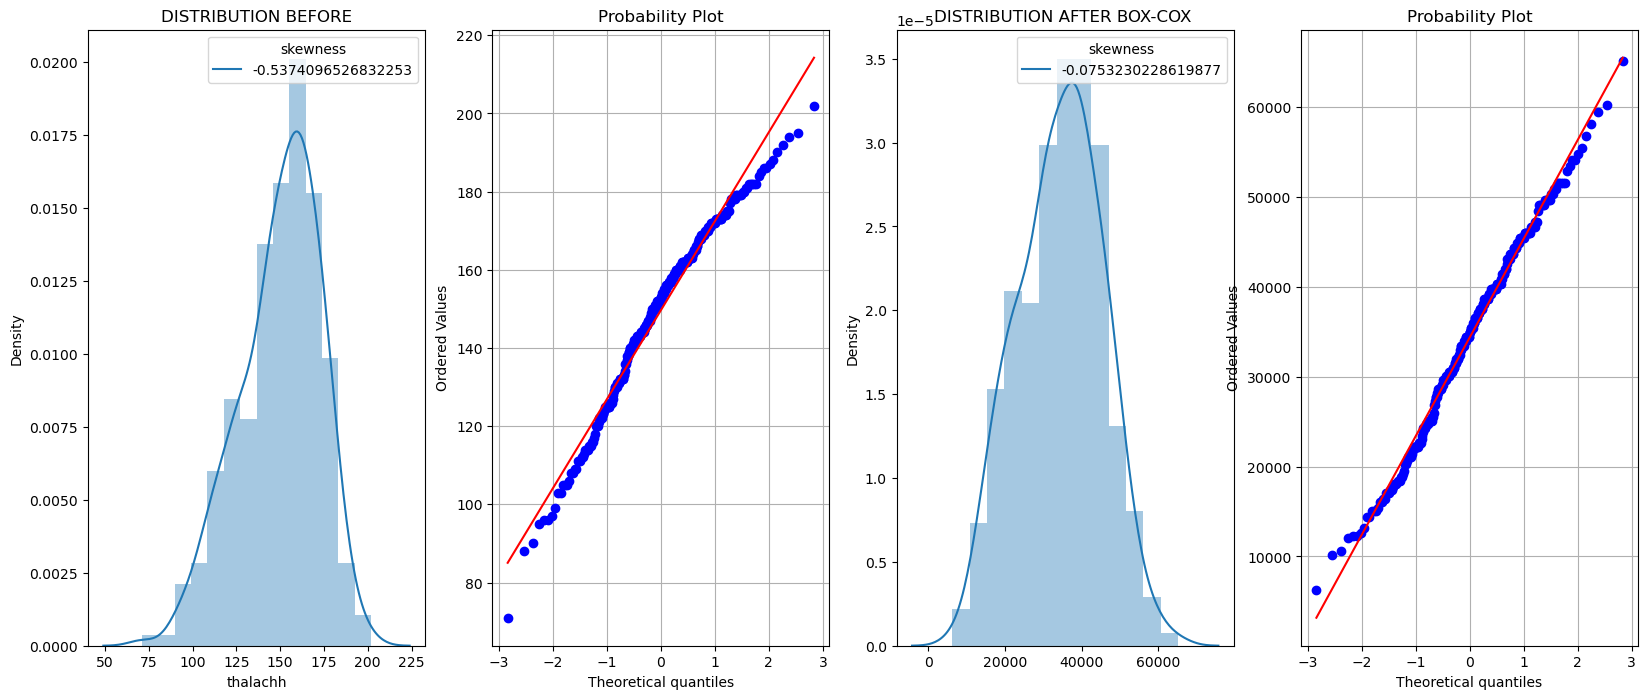

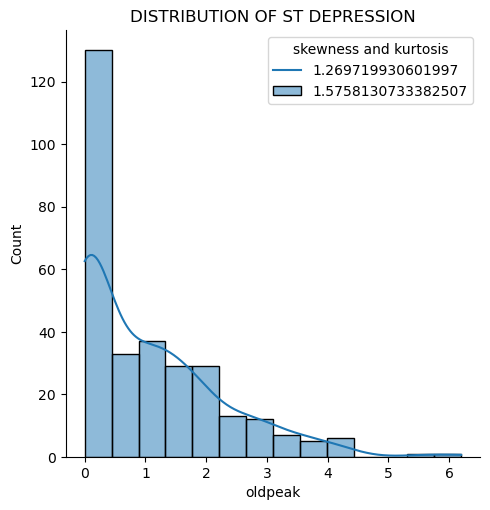

In [17]:
sns.displot(df["oldpeak"],kde=True)
plt.title("DISTRIBUTION OF ST DEPRESSION",fontsize=12)
skewness=str(df["oldpeak"].skew())
kurtosis=str(df["oldpeak"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.savefig('oldpeak.png', dpi=500, bbox_inches = 'tight')
plt.show()

In [18]:
plt.figure(figsize=(20,8))


plt.subplot(1,4,1)
sns.distplot(df["oldpeak"])
plt.title("DISTRIBUTION BEFORE",)
skewness=str(df["oldpeak"].skew())
plt.legend([skewness],title=("skewness"))


plt.subplot(1,4,2)
stats.probplot(df["oldpeak"],dist="norm",plot=plt)
plt.grid()

plt.subplot(1,4,3)
yf_target, lam = yeojohnson(df["oldpeak"])
sns.distplot(yf_target)
plt.title("DISTRIBUTION AFTER YEO JHONSON ",)
series=pd.Series(yf_target)
skewness=str(series.skew())
plt.legend([skewness],title=("skewness"))
#plt.show()

plt.subplot(1,4,4)
stats.probplot(yf_target,dist="norm",plot=plt)
plt.grid()

plt.savefig('transformedoldpeak.png', dpi=500, bbox_inches = 'tight')

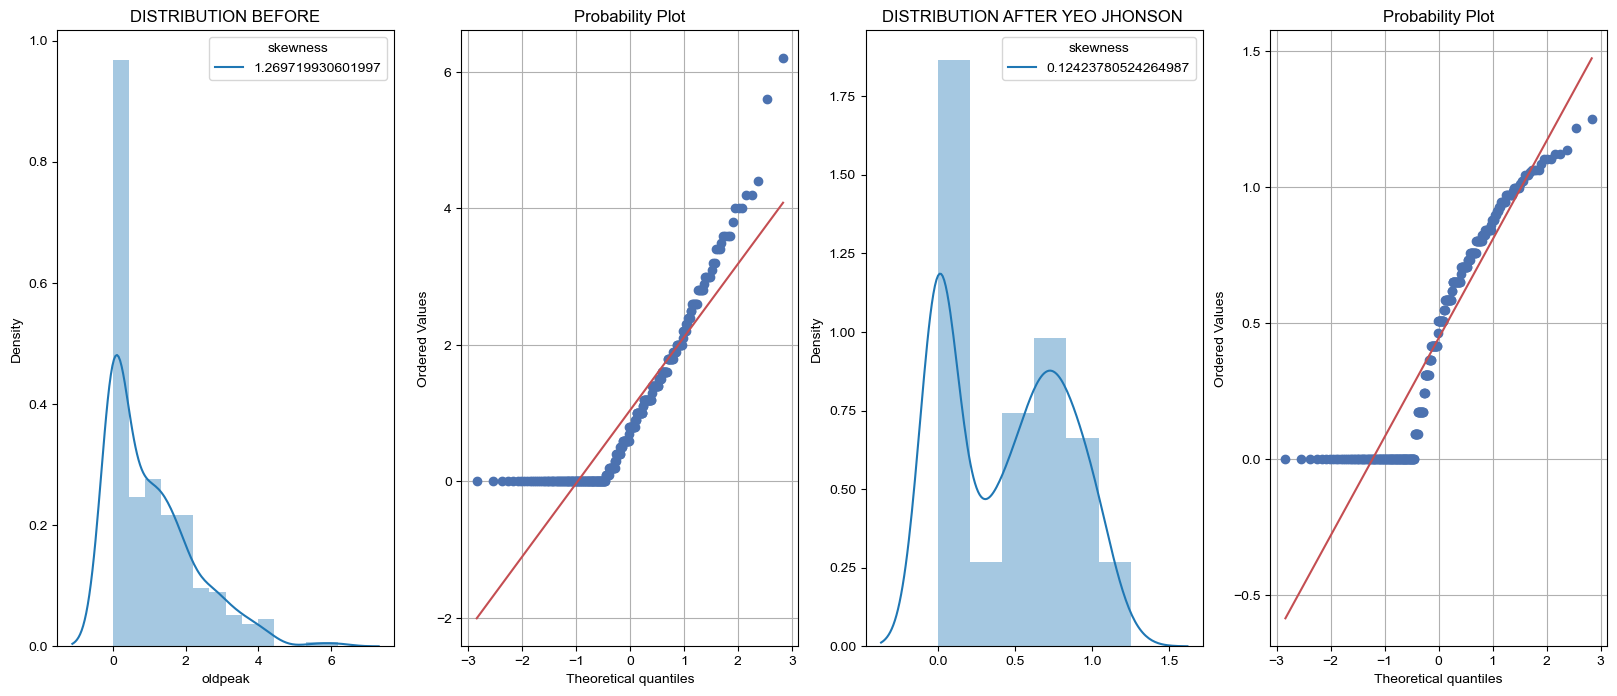

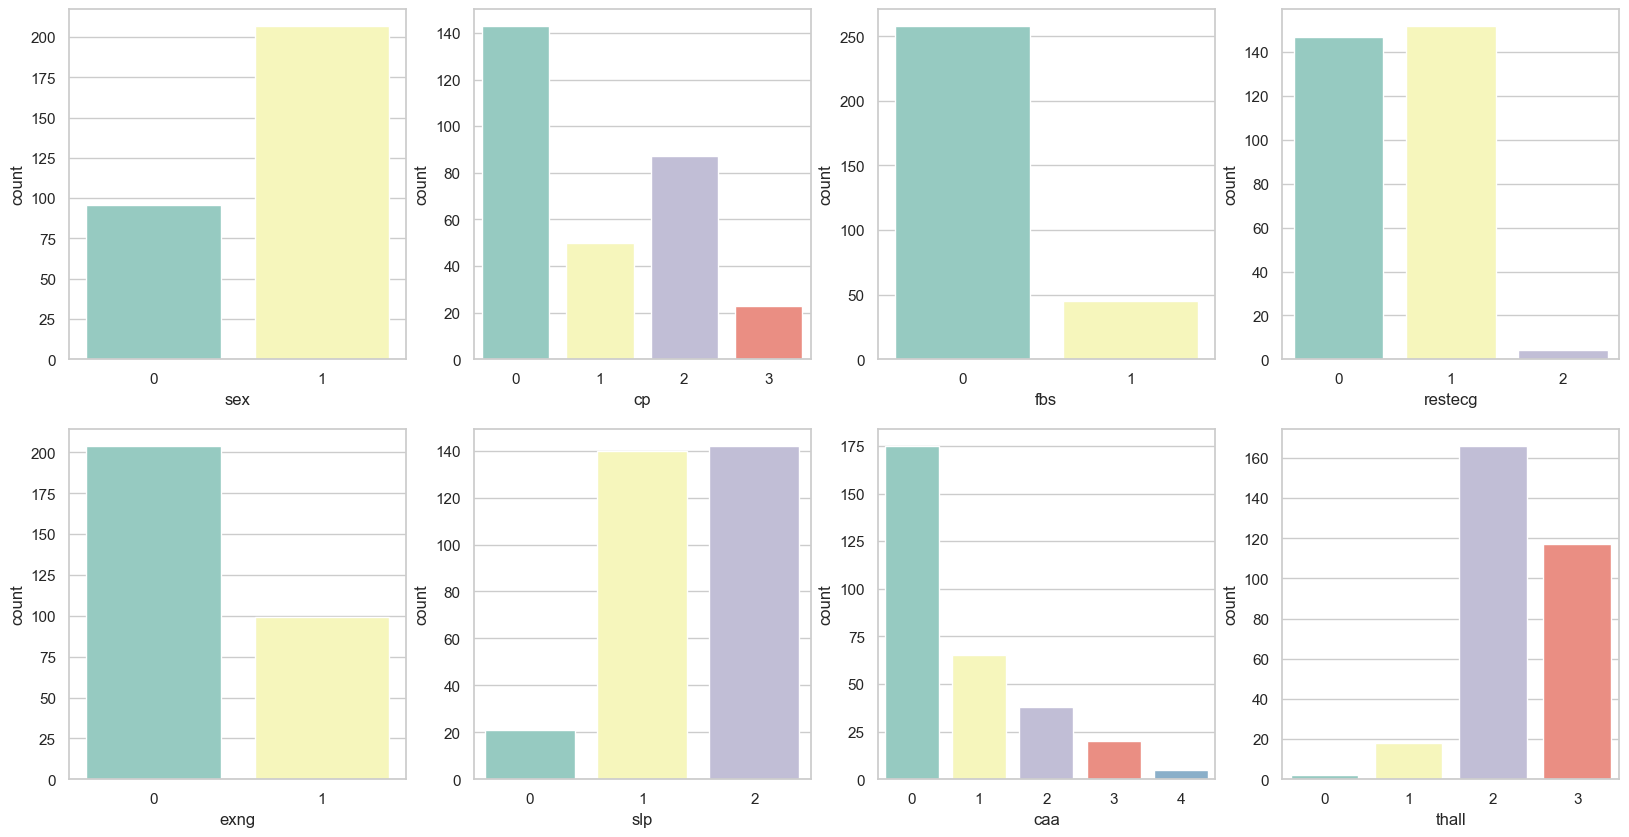

In [19]:
plt.figure(figsize=(20,10))
sns.set_theme(style='whitegrid')
plt.subplot(2,4,1)
sns.countplot(data=df,x='sex',palette="Set3")
plt.subplot(2,4,2)
sns.countplot(data=df,x='cp',palette="Set3")
plt.subplot(2,4,3)
sns.countplot(data=df,x='fbs',palette="Set3")
plt.subplot(2,4,4)
sns.countplot(data=df,x='restecg',palette="Set3")
plt.subplot(2,4,5)
sns.countplot(data=df,x='exng',palette="Set3")
plt.subplot(2,4,6)
sns.countplot(data=df,x='slp',palette="Set3")
plt.subplot(2,4,7)
sns.countplot(data=df,x='caa',palette="Set3")
plt.subplot(2,4,8)
sns.countplot(data=df,x='thall',palette="Set3")
plt.savefig('cat.png', dpi=500, bbox_inches = 'tight')
plt.show()